In [26]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet_v2 import ResNet101V2, preprocess_input
from keras.applications.efficientnet_v2 import EfficientNetV2M, preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import ThresholdedReLU
from keras.models import load_model
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import PIL

In [27]:
TYPE_DATA_FOLDER_PATH  = "datasets\\isolated_test_dataset"
AKIEC_DATA_FOLDER_PATH = "datasets\\isolated_test_dataset\\akiec\\*"
BCC_DATA_FOLDER_PATH   = "datasets\\isolated_test_dataset\\bcc\\*"
DF_DATA_FOLDER_PATH    = "datasets\\isolated_test_dataset\\df\\*"
MEL_DATA_FOLDER_PATH   = "datasets\\isolated_test_dataset\\mel\\*"
NV_DATA_FOLDER_PATH    = "datasets\\isolated_test_dataset\\nv\\*"
VASC_DATA_FOLDER_PATH  = "datasets\\isolated_test_dataset\\vasc\\*"
TARGET_SIZE = (256, 256)
INPUT_SHAPE = (256, 256, 3)
BATCH_SIZE = 8

In [28]:
imgs_AKIEC  = glob.glob(AKIEC_DATA_FOLDER_PATH)
imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH)
imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH)
imgs_MEL    = glob.glob(MEL_DATA_FOLDER_PATH)
imgs_NV     = glob.glob(NV_DATA_FOLDER_PATH)
imgs_VASC   = glob.glob(VASC_DATA_FOLDER_PATH)

df_AKIEC = pd.DataFrame({'filename': imgs_AKIEC})
df_AKIEC['class'] = 'AKIEC'
df_BCC = pd.DataFrame({'filename': imgs_BCC})
df_BCC['class'] = 'BCC'

df_DF = pd.DataFrame({'filename': imgs_DF})
df_DF['class'] = 'DF'
df_MEL = pd.DataFrame({'filename': imgs_MEL})
df_MEL['class'] = 'MEL'
df_NV = pd.DataFrame({'filename': imgs_NV})
df_NV['class'] = 'NV'
df_VASC = pd.DataFrame({'filename': imgs_VASC})
df_VASC['class'] = 'VASC'

AKIEC = 'AKIEC'
BCC = 'BCC'
BKL = 'BKL'
DF = 'DF'
MEL = 'MEL'
NV= 'NV'
VASC = 'VASC'

df = pd.concat([df_AKIEC, df_BCC, df_DF, df_MEL, df_NV, df_VASC])

df_train, df_temp = train_test_split(df, stratify=df["class"], test_size=.2)
df_val, df_test = train_test_split(df_temp, stratify=df_temp["class"], test_size=.5)

In [29]:
data_generator_vis = ImageDataGenerator()
flow_vis = data_generator_vis.flow_from_directory(
    TYPE_DATA_FOLDER_PATH,
    shuffle=False
)

Found 1602 images belonging to 6 classes.


In [30]:
data_generator_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [32]:
flow_test = data_generator_test.flow_from_dataframe(
    df_test,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 161 validated image filenames belonging to 6 classes.


In [33]:
model_eff = load_model("model\\mymodel3.h5")

In [25]:
_, effnet_accuracy = model_eff.evaluate(flow_test)

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "d:\Programming\Pythons\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "d:\Programming\Pythons\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "d:\Programming\Pythons\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "d:\Programming\Pythons\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "d:\Programming\Pythons\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "d:\Programming\Pythons\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "d:\Programming\Pythons\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "d:\Programming\Pythons\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "d:\Programming\Pythons\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\Programming\Pythons\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "d:\Programming\Pythons\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "d:\Programming\Pythons\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "d:\Programming\Pythons\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "d:\Programming\Pythons\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "d:\Programming\Pythons\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\Programming\Pythons\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "d:\Programming\Pythons\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "d:\Programming\Pythons\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\Programming\Pythons\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\Programming\Pythons\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\Programming\Pythons\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\artur\AppData\Local\Temp\ipykernel_2280\1825612319.py", line 1, in <cell line: 1>
      _, effnet_accuracy = model_eff.evaluate(flow_test)
    File "d:\Programming\Pythons\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programming\Pythons\lib\site-packages\keras\engine\training.py", line 1756, in evaluate
      tmp_logs = self.test_function(iterator)
    File "d:\Programming\Pythons\lib\site-packages\keras\engine\training.py", line 1557, in test_function
      return step_function(self, iterator)
    File "d:\Programming\Pythons\lib\site-packages\keras\engine\training.py", line 1546, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Programming\Pythons\lib\site-packages\keras\engine\training.py", line 1535, in run_step
      outputs = model.test_step(data)
    File "d:\Programming\Pythons\lib\site-packages\keras\engine\training.py", line 1501, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\Programming\Pythons\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "d:\Programming\Pythons\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\Programming\Pythons\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "d:\Programming\Pythons\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\Programming\Pythons\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "d:\Programming\Pythons\lib\site-packages\keras\backend.py", line 5134, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[8,7] labels_size=[8,6]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_96891]

21/21 [==============================] - 3s 85ms/step


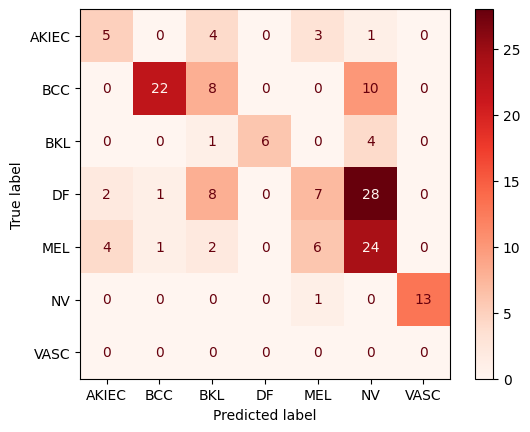

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ava_labels = [AKIEC, BCC, BKL, DF, MEL, NV, VASC]
true_labels = flow_test.classes
predictions = model_eff.predict(flow_test)
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=ava_labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [38]:


model_eff.predict('datasets\isolated_test_dataset\mel\ISIC_0000022.jpg')

IndexError: tuple index out of range